<a href="https://colab.research.google.com/github/itsmenisha/Codesoft/blob/main/TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Loading the Datasets

In [3]:
df=pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df.shape

(418, 12)

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [12]:
df['Fare']=df['Fare'].fillna(df['Fare'].mode()[0])

In [13]:
df=df.drop(columns=['Cabin'])

In [14]:
df=df.drop_duplicates()

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


In [17]:
df.sort_values(by=['Age'],ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.00,1,0,19877,78.8500,S
81,973,0,1,"Straus, Mr. Isidor",male,67.00,1,0,PC 17483,221.7792,S
236,1128,0,1,"Warren, Mr. Frank Manley",male,64.00,1,0,110813,75.2500,C
179,1071,1,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.00,0,2,PC 17756,83.1583,C
305,1197,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.00,1,1,112901,26.5500,S
...,...,...,...,...,...,...,...,...,...,...,...
250,1142,1,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,S
307,1199,0,3,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.3500,S
281,1173,0,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.7750,S
201,1093,0,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,S


In [19]:
df['Age'].describe()

count    418.000000
mean      30.272590
std       12.634534
min        0.170000
25%       23.000000
50%       30.272590
75%       35.750000
max       76.000000
Name: Age, dtype: float64

In [20]:
sta=df.groupby(['Sex'])
sta['Age'].value_counts()

Sex     Age     
female  30.27259    25
        22.00000    10
        45.00000     7
        18.00000     7
        30.00000     6
                    ..
male    11.50000     1
        14.50000     1
        19.00000     1
        22.50000     1
        67.00000     1
Name: count, Length: 117, dtype: int64

In [21]:
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [22]:
df['Survived']=df['Survived'].map({0:"No",1:"Yes"})

In [23]:
df['Survived'].value_counts()

Survived
No     266
Yes    152
Name: count, dtype: int64

In [24]:
sta['Survived'].value_counts()

Sex     Survived
female  Yes         152
male    No          266
Name: count, dtype: int64

In [27]:
has_survived=df['Survived'].str.contains('Yes')
df[has_survived]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,893,Yes,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
4,896,Yes,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
6,898,Yes,3,"Connolly, Miss. Kate",female,30.00000,0,0,330972,7.6292,Q
8,900,Yes,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00000,0,0,2657,7.2292,C
12,904,Yes,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.00000,1,0,21228,82.2667,S
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,Yes,3,"Peacock, Miss. Treasteall",female,3.00000,1,1,SOTON/O.Q. 3101315,13.7750,S
410,1302,Yes,3,"Naughton, Miss. Hannah",female,30.27259,0,0,365237,7.7500,Q
411,1303,Yes,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.00000,1,0,19928,90.0000,Q
412,1304,Yes,3,"Henriksson, Miss. Jenny Lovisa",female,28.00000,0,0,347086,7.7750,S


In [38]:
has_survived[filt].value_counts()

Survived
False    24
True     17
Name: count, dtype: int64

In [29]:
filt2=df['Age']>60
df[filt2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
2,894,No,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
13,905,No,2,"Howard, Mr. Benjamin",male,63.0,1,0,24065,26.0000,S
81,973,No,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,S
96,988,Yes,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,S
114,1006,Yes,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,S
142,1034,No,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,C
152,1044,No,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,7.7500,S
179,1071,Yes,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,C
193,1085,No,2,"Lingane, Mr. John",male,61.0,0,0,235509,12.3500,Q
236,1128,No,1,"Warren, Mr. Frank Manley",male,64.0,1,0,110813,75.2500,C


In [30]:
df.loc[filt2,'Age'].count()

11

In [32]:
has_survived[filt2].value_counts()

Survived
False    7
True     4
Name: count, dtype: int64

In [33]:
filt_femal=df['Sex']=='female'

In [35]:
has_survived[filt_femal].value_counts()

Survived
True    152
Name: count, dtype: int64

In [36]:
filt_mal=df['Sex']=='male'

In [37]:
has_survived[filt_mal].value_counts()

Survived
False    266
Name: count, dtype: int64

### Visualizing the Datasets into different graphs

<Axes: xlabel='Survived', ylabel='count'>

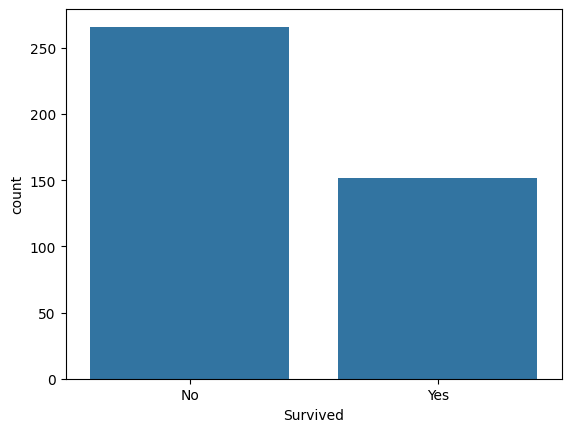

In [44]:
has_survived.value_counts()
sns.countplot(data=df,x='Survived')

<Axes: xlabel='Sex', ylabel='count'>

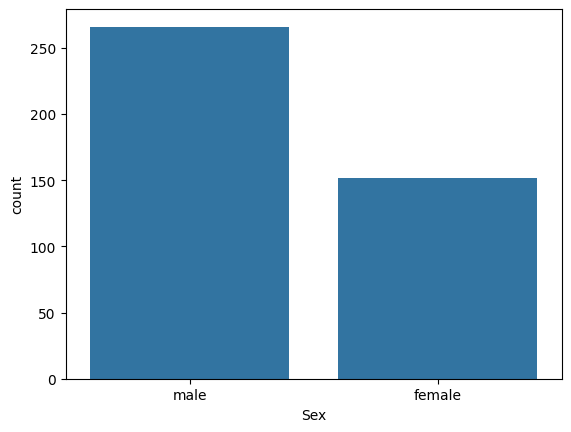

In [45]:
sns.countplot(data=df,x='Sex')

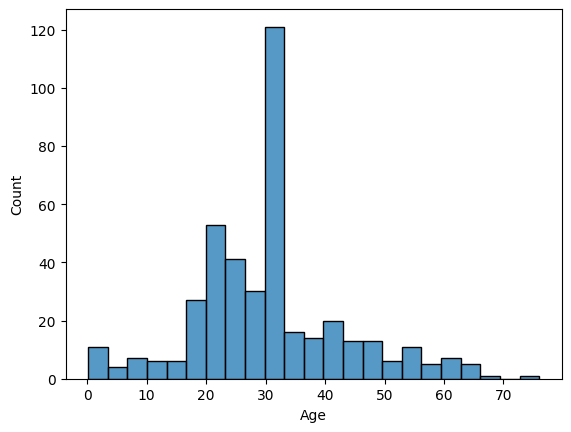

In [46]:
sns.histplot(data=df, x='Age')
plt.show()

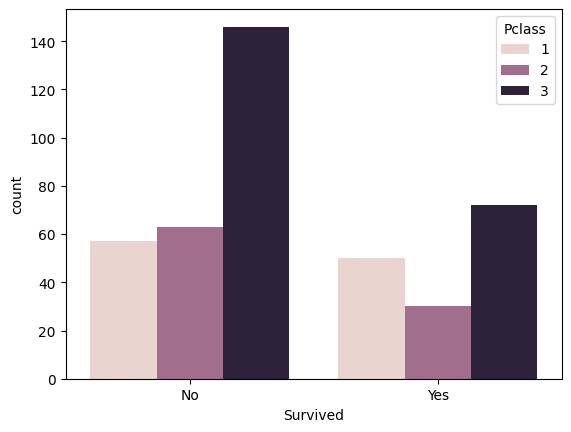

In [53]:
sns.countplot(x=df['Survived'], hue=df['Pclass'])
plt.show()

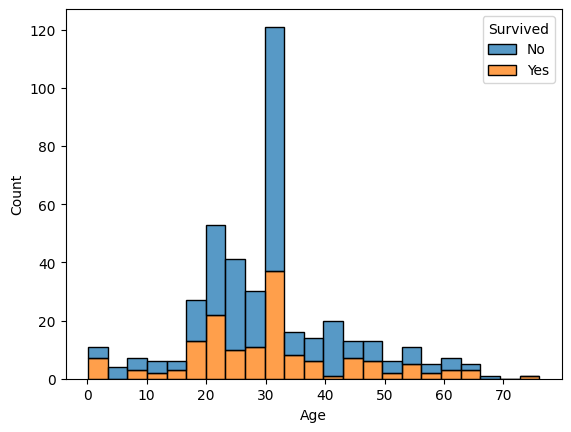

In [52]:
# show survival wrt Age
sns.histplot(x=df['Age'], hue=df['Survived'], multiple='stack')
plt.show()

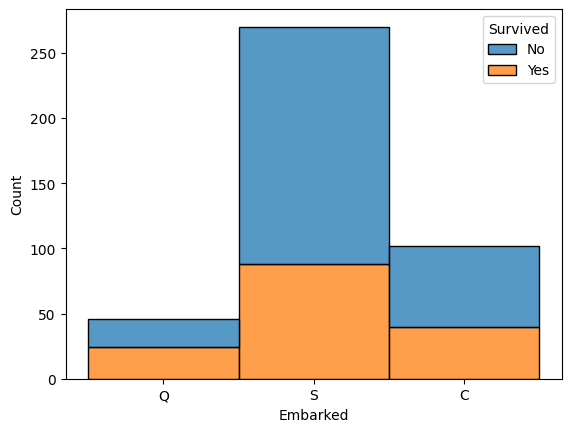

In [55]:
sns.histplot(x=df['Embarked'], hue=df['Survived'], multiple='stack')
plt.show()

#Featuring Engineering
##Before modeling the data, transform gender(Sex) into numeric

### Male - 1
### Female - 0
## Use Label Encoder from sklearn library

In [56]:
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,No,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,Yes,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,No,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,No,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,Yes,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


In [60]:
df['Sex'].head()

0    1
1    0
2    1
3    1
4    0
Name: Sex, dtype: int64

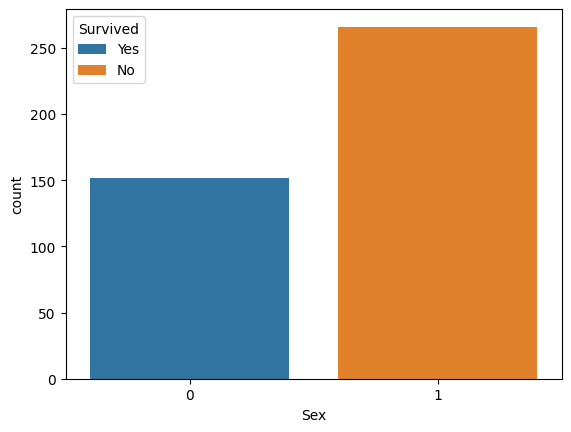

In [61]:
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.show()

In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,No,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,Yes,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,No,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,No,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,Yes,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


# Modeling

In [63]:
X=df[['Sex', 'Pclass']]
Y=df['Survived']

In [64]:
# Split data into test and train by using Sklearn library
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [65]:
# Create training Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [66]:
# create Prediction model
pred = log.predict(X_test)
pred

array(['No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'No'], dtype=object)

In [67]:
print("Accuracy_score :", accuracy_score(Y_test, pred))
print("Matrix :",confusion_matrix(Y_test,pred))

Accuracy_score : 1.0
Matrix : [[45  0]
 [ 0 39]]


In [68]:
Y_test

360     No
170     No
224    Yes
358     No
309    Yes
      ... 
100    Yes
7       No
22     Yes
68      No
328     No
Name: Survived, Length: 84, dtype: object

In [69]:
submission=X.iloc[:,:].values
y_final=log.predict(submission)
y_final.shape

(418,)

In [70]:
final = pd.DataFrame()
final["Sex"]= X['Sex']
final["survived"]=y_final
final.to_csv("submission.csv",index=False)

#Checking if the passenger survived or not

In [71]:
result = log.predict([[1,0]])
if(result == 0):
    print("So Sorry, Didn't Survived")
else:
    print("Survived")

Survived


In [72]:
result = log.predict([[7,0]])
if(result == 0):
    print("So Sorry, Didn't Survived")
else:
    print("Survived")

Survived


#This is the prediction model of titanic survival